In [2]:
import pandas as pd
housing = pd.read_csv(r"C:\Users\Bharath\OneDrive\Desktop\Machine_Learning_Book\housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


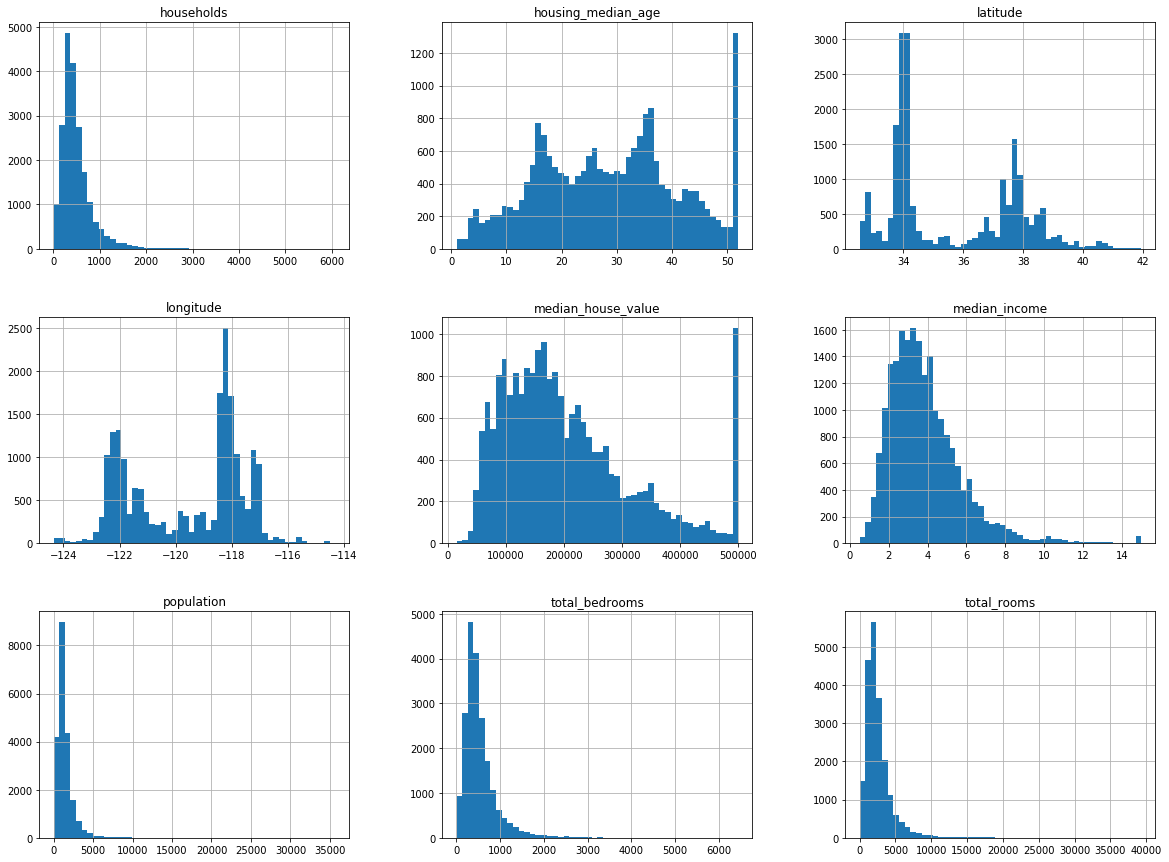

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50,figsize=(20,15))
plt.show()

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We can see in the above data that there are 207 data points missing under total_bedrooms. Now while giving data to a predition algorithim we need handle missing data.

We can do this in multiple ways. Let's discuss the best aproaches to solving this problem:
1. We can remove the entire row that has a null value.
2. We can replace the null value with mean or mode of the entire column.

## Importance of test data:

It is important to note that before we proceed to making changes to the data, we should separate out the training set of data. This is help us test our algorithim post the training process.

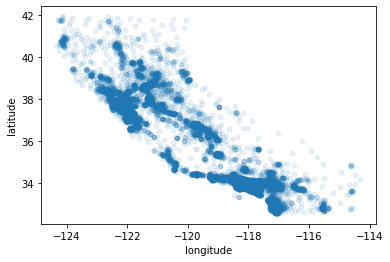

In [6]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=.1)

In [7]:
housing['total_bedrooms'].head()

0     129.0
1    1106.0
2     190.0
3     235.0
4     280.0
Name: total_bedrooms, dtype: float64

In [18]:
import numpy as np
mean = int(np.mean(housing['total_bedrooms']))

In [19]:
housing['total_bedrooms'].fillna(mean,inplace=True)

In [21]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
